In [7]:
import tqdm
import pandas as pd
import matplotlib.pyplot as plt

# 数据读取
data = open("D:\\学习资料\\数据挖掘\\第三次作业\\anonymous-msweb.data")
web_id = []
watch_id = []
webs = dict()
logs = dict()
# 提取信息
for line in tqdm.tqdm(data.readlines()):
    # print(line)
    # 提取网站信息
    if line[0] == 'A':
        web = line.split(',')[1]
        web_id.append(web)
        webs[web] = ''.join(line.split(',')[-2:])
    # 提取用户信息
    elif line[0] == 'C':
        index = line.split(',')[2][:-1]
        logs[index] = []
    # 提取浏览记录
    elif line[0] == 'V':
        web = line.split(',')[1]
        watch_id.append(web)
        logs[index].append(web)
# 预览
print("-------------前十个网站信息------------")
for i, (k, v) in enumerate(webs.items()):
    if i in range(0, 10):
        print(k, v)
print("-------------前十条浏览记录------------")
for i, (k, v) in enumerate(logs.items()):
    if i in range(0, 10):
        print(k, v)

100%|██████████████████████████████████████████████████████████████████████| 131666/131666 [00:00<00:00, 627359.05it/s]

-------------前十个网站信息------------
1287 "International AutoRoute""/autoroute"

1288 "library""/library"

1289 "Master Chef Product Information""/masterchef"

1297 "Central America""/centroam"

1215 "For Developers Only Info""/developer"

1279 "Multimedia Golf""/msgolf"

1239 "Microsoft Consulting""/msconsult"

1282 "home""/home"

1251 "Reference Support""/referencesupport"

1121 "Microsoft Magazine""/magazine"

-------------前十条浏览记录------------
10001 ['1000', '1001', '1002']
10002 ['1001', '1003']
10003 ['1001', '1003', '1004']
10004 ['1005']
10005 ['1006']
10006 ['1003', '1004']
10007 ['1007']
10008 ['1004']
10009 ['1008', '1009']
10010 ['1010', '1000', '1011', '1012', '1013', '1014']


In [8]:
# 验证是否缺失
web_list = set(web_id)
watch_lst = set(watch_id)
all_web_list = web_list | watch_lst
if len(all_web_list) == len(web_list):
    print('网站列表包含所有访问网站，无缺失！')
else:
    print('存在网站未列出，有缺失！')

网站列表包含所有访问网站，无缺失！


访问次数最多的网站是：
"Free Downloads""/msdownload"



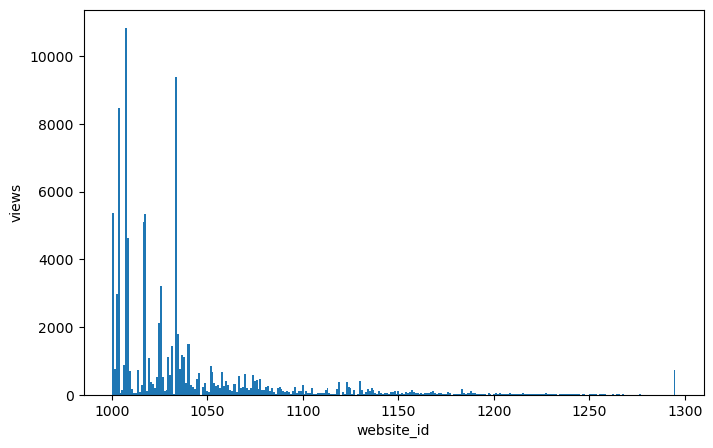

In [11]:
# 统计网页访问次数
result = pd.value_counts(watch_id)
print("访问次数最多的网站是：")
print(webs[result.index[0]])
# 访问量分布
hist = [int(i) for i in watch_id]
plt.figure(figsize=[8, 5])
plt.hist(hist, bins=294)
plt.xlabel("website_id")
plt.ylabel("views")
plt.show()

In [12]:
# 频繁项集计算函数
def Frequent(dic, transactions, min_sup):
    cur_collection = {}
    n_sup = int(len(transactions) * min_sup)

    # 初始化1-频繁集
    C = [[item] for item in dic.keys()]
    C.sort(key=lambda x: x[0])

    itemset_list = [set(itemset) for itemset in transactions.values()]

    iter_num = len(dic.keys())
    for i in range(iter_num):
        # 过滤当前集
        K = list()
        for item in C:
            item = set(item)
            count = 0
            for itemset in itemset_list:
                if item & itemset == item:
                    count += 1
            if count >= n_sup:
                item = list(item)
                item.sort()
                K.append(item)

        if len(K):
            cur_collection["L" + str(i + 1)] = K

        # 生成下一待过滤频繁集
        K_l = len(K)
        no_trim_C = set()
        for i in range(K_l - 1):
            for j in range(i + 1, K_l):
                if K[i][:-1] == K[j][:-1]:
                    temp = K[i][:-1]
                    a, b = K[i][-1], K[j][-1]
                    temp += [a, b] if a < b else [b, a]
                    no_trim_C.add(tuple(temp))
        if len(no_trim_C) == 0:
            break

        # 结束判断
        if iter_num == 0:
            C = [list(itemset) for itemset in no_trim_C]
            continue

        C = []
        K = {tuple(itemset) for itemset in K}
        for itemset in no_trim_C:
            itemset = sorted(list(itemset))
            for item in itemset:
                temp_itemset = itemset.copy()
                temp_itemset.remove(item)
                temp_itemset = tuple(temp_itemset)
                if temp_itemset not in K:
                    break
            else:
                C.append(itemset)

        if len(C) == 0:
            break

    return cur_collection

In [14]:
# 计算频繁项集，频繁集内元素为网页id
result = Frequent(webs, logs, 0.02)
for k in result:
    print(k, ":")
    for v in result[k]:
        print("({})".format(' '.join(v)), end="  ")
    print()

L1 :
(1000)  (1001)  (1002)  (1003)  (1004)  (1007)  (1008)  (1009)  (1010)  (1014)  (1017)  (1018)  (1020)  (1025)  (1026)  (1030)  (1032)  (1034)  (1035)  (1036)  (1037)  (1038)  (1040)  (1041)  (1052)  (1053)  (1058)  (1295)  
L2 :
(1004 1034)  (1004 1008)  (1001 1018)  (1009 1037)  (1008 1018)  (1009 1034)  (1003 1018)  (1001 1009)  (1008 1017)  (1026 1041)  (1026 1038)  (1026 1034)  (1018 1035)  (1004 1017)  (1025 1026)  (1001 1035)  (1017 1018)  (1008 1035)  (1001 1004)  (1004 1018)  (1003 1035)  (1001 1003)  (1003 1004)  (1018 1034)  (1001 1034)  (1001 1008)  (1008 1009)  (1008 1034)  (1008 1026)  (1004 1009)  (1003 1008)  (1009 1017)  (1009 1018)  (1001 1017)  (1009 1035)  (1017 1034)  
L3 :
(1009 1018 1035)  (1001 1008 1018)  (1003 1018 1035)  (1008 1009 1035)  (1001 1003 1018)  (1008 1009 1034)  (1008 1017 1034)  (1001 1004 1018)  (1008 1009 1018)  (1008 1018 1035)  (1004 1008 1034)  (1001 1003 1004)  (1008 1018 1034)  (1001 1018 1035)  
L4 :
(1008 1009 1018 1035)  


In [15]:
# 计算关联规则
from apyori import apriori
min_supp = 0.01
min_conf = 0.005
min_lift = 0
transactions = [i for i in logs.values()]
ar = list(apriori(transactions=transactions, min_support=min_supp, min_confidence=min_conf, min_lift=min_lift))

supports = []
confidences = []
lifts = []
bases = []
adds = []

# 转换成pdframe
for r in ar:
    for x in r.ordered_statistics:
        supports.append(r.support)
        confidences.append(x.confidence)
        lifts.append(x.lift)
        bases.append(list(x.items_base))
        adds.append(list(x.items_add))

result = pd.DataFrame({
    'support': supports,
    'confidence': confidences,
    'lift': lifts,
    'base': bases,
    'add': adds
})

In [24]:
# 计算强关联规则，及对应的支持度、自信度、上升度
res = result[(result.lift > 1) & (result.support > 0.02) & (result.confidence > 0.5)]
res = res.reset_index(drop=True)

pd.set_option('display.max_columns', None)
print("在提升度大于1、支持度大于0.02、置信度大于0.5条件下的强相关规则有{}条，分别如下：".format(res.shape[0]))
print(res)

在提升度大于1、支持度大于0.02、置信度大于0.5条件下的强相关规则有38条，分别如下：
     support  confidence       lift                base           add
0   0.055211    0.608491   4.471879              [1003]        [1001]
1   0.029592    0.540480   3.972062              [1035]        [1001]
2   0.046896    0.516846   3.171963              [1003]        [1018]
3   0.077925    0.550778   1.662652              [1009]        [1008]
4   0.160802    0.560588   1.692267              [1034]        [1008]
5   0.032833    0.599665   4.238471              [1035]        [1009]
6   0.032436    0.914655   6.464841              [1037]        [1009]
7   0.046070    0.841429   5.163977              [1035]        [1018]
8   0.035309    0.544041   5.526752              [1025]        [1026]
9   0.027300    0.804505   8.172716              [1038]        [1026]
10  0.028156    0.614000   6.237439              [1041]        [1026]
11  0.022806    0.582358   4.279824        [1003, 1004]        [1001]
12  0.033230    0.601883   3.693843        [

### 结果分析与应用

经过对网页浏览记录的关联规则抽取，能够发现强度极其相关的网页，即用户在访问某一网页时大概率会访问已知的另一网页。
对于上述已经筛选过的强关联规则，对应基项元素的各网站在设计时应考虑增设对应添加项元素的网站导航，以提升用户体验。